#### Vivian Xia

##Compare Different Quicksort Pivot Points

Illustrate the effects of choosing different pivot points for Quicksort on sorted and unsorted lists of increasing length.  Create a table of results and a set of plots to illustrate your findings.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

import random
from string import ascii_letters

from tabulate import tabulate

In [ ]:
import sys
sys.setrecursionlimit(25000)

In [ ]:
def quicksort(array):
    
  print("Sorting array: {0}".format(array))  
    
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    
    print("{0} <{1}> {2}".format(less, pivot, greater))
    
    return quicksort(less) + [pivot] + quicksort(greater)


In [ ]:
def sort_times(list_string):

  start_time = time.perf_counter()
  quicksort(list_string)
  end_time = time.perf_counter()
  quicksort_time = end_time - start_time

  return quicksort_time

###Illustrate with simpler array to see the step-by-step.

Because the algorithm takes the first element of the array as its pivot, I generated a random list of 10 integers. 

In [ ]:
np.random.seed(22)
list_int = np.random.randint(1,100,10)
list_int

array([ 5, 45, 65, 85,  9, 96, 94, 19, 15, 46])

####Worst Case

The list is sorted to illustrate the worst case scenario.  

In [ ]:
#one worst case
worst_case = list_int.copy()
worst_case = sorted(worst_case, reverse=True)

worst_time = quicksort(worst_case)
worst_time

Sorting array: [96, 94, 85, 65, 46, 45, 19, 15, 9, 5]
[94, 85, 65, 46, 45, 19, 15, 9, 5] <96> []
Sorting array: [94, 85, 65, 46, 45, 19, 15, 9, 5]
[85, 65, 46, 45, 19, 15, 9, 5] <94> []
Sorting array: [85, 65, 46, 45, 19, 15, 9, 5]
[65, 46, 45, 19, 15, 9, 5] <85> []
Sorting array: [65, 46, 45, 19, 15, 9, 5]
[46, 45, 19, 15, 9, 5] <65> []
Sorting array: [46, 45, 19, 15, 9, 5]
[45, 19, 15, 9, 5] <46> []
Sorting array: [45, 19, 15, 9, 5]
[19, 15, 9, 5] <45> []
Sorting array: [19, 15, 9, 5]
[15, 9, 5] <19> []
Sorting array: [15, 9, 5]
[9, 5] <15> []
Sorting array: [9, 5]
[5] <9> []
Sorting array: [5]
Sorting array: []
Sorting array: []
Sorting array: []
Sorting array: []
Sorting array: []
Sorting array: []
Sorting array: []
Sorting array: []
Sorting array: []


[5, 9, 15, 19, 45, 46, 65, 85, 94, 96]

The worst cases are when the pivot is the smallest or largest value in the list. In this case, the pivot is the largest value. The resulting partition has one sub-array with the remaining 9 elements while the other sub-array has no elements. Because the list is already sorted, as the sub-array gets partitioned again, it takes the largest value as the pivot, resulting in one empty sub-array and one with 8 elements. This dividing continues until there is zero or one element in each of the sub-arrays. 

This quicksort has a total height of 10 since the algorithm had to go through 10 iterations. Each level takes O(n) time, so the worst case takes O(n*n) or O(n^2) to complete. 

In [ ]:
#another worst case
worst_case = list_int.copy()
worst_case = sorted(worst_case)

worst_time = quicksort(worst_case)
worst_time

Sorting array: [5, 9, 15, 19, 45, 46, 65, 85, 94, 96]
[] <5> [9, 15, 19, 45, 46, 65, 85, 94, 96]
Sorting array: []
Sorting array: [9, 15, 19, 45, 46, 65, 85, 94, 96]
[] <9> [15, 19, 45, 46, 65, 85, 94, 96]
Sorting array: []
Sorting array: [15, 19, 45, 46, 65, 85, 94, 96]
[] <15> [19, 45, 46, 65, 85, 94, 96]
Sorting array: []
Sorting array: [19, 45, 46, 65, 85, 94, 96]
[] <19> [45, 46, 65, 85, 94, 96]
Sorting array: []
Sorting array: [45, 46, 65, 85, 94, 96]
[] <45> [46, 65, 85, 94, 96]
Sorting array: []
Sorting array: [46, 65, 85, 94, 96]
[] <46> [65, 85, 94, 96]
Sorting array: []
Sorting array: [65, 85, 94, 96]
[] <65> [85, 94, 96]
Sorting array: []
Sorting array: [85, 94, 96]
[] <85> [94, 96]
Sorting array: []
Sorting array: [94, 96]
[] <94> [96]
Sorting array: []
Sorting array: [96]


[5, 9, 15, 19, 45, 46, 65, 85, 94, 96]

Similarly, this example is also a worse case because the pivot is always the smallest value in the array and sub-array. This also results in 10 levels, so the time complexitiy is O(n^2) as well.

#### Best Case

The best case occurs when the pivot is the middle element each time. For this example, I fixed the first element to be 50, a value in the middle of the range of possible values. 

In [ ]:
#best case
best_case = list_int.copy() 
best_case[0] = 50 

best_time = quicksort(best_case)
best_time

Sorting array: [50 45 65 85  9 96 94 19 15 46]
[45, 9, 19, 15, 46] <50> [65, 85, 96, 94]
Sorting array: [45, 9, 19, 15, 46]
[9, 19, 15] <45> [46]
Sorting array: [9, 19, 15]
[] <9> [19, 15]
Sorting array: []
Sorting array: [19, 15]
[15] <19> []
Sorting array: [15]
Sorting array: []
Sorting array: [46]
Sorting array: [65, 85, 96, 94]
[] <65> [85, 96, 94]
Sorting array: []
Sorting array: [85, 96, 94]
[] <85> [96, 94]
Sorting array: []
Sorting array: [96, 94]
[94] <96> []
Sorting array: [94]
Sorting array: []


[9, 15, 19, 45, 46, 50, 65, 85, 94, 96]

Because the value 50 was picked as the pivot, the array divided into sub-arrays of an equal number of elements. There are five elements in the first sub-array and four in the second sub-array. 

This example is not the best of the best cases since the middle value is not continously picked as the pivot each time. But this example does show that by picking a value that is not the smallest or largest as the pivot will result in a smaller call stack. The base case for each sub-array is reached in less steps, thus the stack size for best case and average case scenarios such as this one is O(log n). It takes O(n) to run each level so the time complexitiy for these cases are O(n log n). 


### Compare cases with increasing list lengths.

In [ ]:
#commented out the prints from this quicksort algorithm
def quicksort(array):
    
  #print("Sorting array: {0}".format(array))  
    
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    
    #print("{0} <{1}> {2}".format(less, pivot, greater))
    
    return quicksort(less) + [pivot] + quicksort(greater)


In [ ]:
time_list = []

def times(len):
  np.random.seed(111)
  list_int = np.random.randint(1,10000,len)

  #worst case
  worst_case = list_int.copy()
  worst_case = sorted(worst_case)
  worst_time = sort_times(worst_case)

  #best case
  best_case = list_int.copy()
  best_case[0] = 5000
  best_time = sort_times(best_case)

  return len, worst_time, best_time

In [ ]:
time_list.append(times(500))
time_list.append(times(1000))
time_list.append(times(1500))
time_list.append(times(2000))
time_list.append(times(2500))

In [ ]:
time_list

[(500, 0.029783760001009796, 0.00222873900020204),
 (1000, 0.06752762100040854, 0.002704156000618241),
 (1500, 0.17157475799831445, 0.004234006000842783),
 (2000, 0.2742077379989496, 0.005715727000279003),
 (2500, 0.4161106400006247, 0.0217576459999691)]

In [ ]:
col_names = ["Array Length","Worse Case", "Best Case"]

print(tabulate(time_list, headers=col_names, tablefmt="fancy_grid"))

╒════════════════╤══════════════╤═════════════╕
│   Array Length │   Worse Case │   Best Case │
╞════════════════╪══════════════╪═════════════╡
│            500 │    0.0297838 │  0.00222874 │
├────────────────┼──────────────┼─────────────┤
│           1000 │    0.0675276 │  0.00270416 │
├────────────────┼──────────────┼─────────────┤
│           1500 │    0.171575  │  0.00423401 │
├────────────────┼──────────────┼─────────────┤
│           2000 │    0.274208  │  0.00571573 │
├────────────────┼──────────────┼─────────────┤
│           2500 │    0.416111  │  0.0217576  │
╘════════════════╧══════════════╧═════════════╛


In [ ]:
df = pd.DataFrame(time_list) #create a dataframe of the list of times
df.columns = col_names
df.head()

,Array Length,Worse Case,Best Case
0,500,0.029784,0.002229
1,1000,0.067528,0.002704
2,1500,0.171575,0.004234
3,2000,0.274208,0.005716
4,2500,0.416111,0.021758


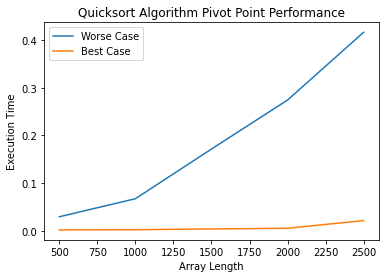

In [ ]:
plt.plot(df['Array Length'], df['Worse Case'], label = 'Worse Case')
plt.plot(df['Array Length'], df['Best Case'], label = 'Best Case')

plt.title('Quicksort Algorithm Pivot Point Performance')
plt.xlabel('Array Length')
plt.ylabel('Execution Time')
plt.legend()

plt.show()

The worst case picked the smallest value as the pivot each time, resulting in O(n^2) time to complete as seen in the graph. The graph curves up like a quadratic, showing that its rate in completing the sort increases as the array length increases. The table also shows that the worst case for quicksort does not scale well. 

Fortunately, the average or best case takes on the time complexity of O(n log n). The graph for the best case does not show that the run time rate increases as drastically as the array length increases. As the table shows, the execution time increases at a much smaller rate than the worst case, so it is able to scale well as the load increases. 